In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [3]:
N,Fs,fc=map(int,input().split())  ##Order of the filter,Sampling frequency in Hz,Cut-off frequency in Hz

2 8000 3400


In [6]:
##Compute Design Sampling parameter
Td=1/Fs


In [7]:
##Compute cut-off frequency in radian/sec

wd=2*np.pi*fc ##Cut-off frequency in radian/sec
print(wd)

21362.83004441059


In [8]:
##Prewarp the analog frequency
      
wc=(2/Td)*np.tan(wd*Td/2)   ##Prewarped analog cut-off frequency
print('Order of the filter=', N)
print('Cut-off frequency (in rad/s)=',wc)


Order of the filter= 2
Cut-off frequency (in rad/s)= 66644.79632144666


In [9]:
##Design analog Butterworth filter using signal.butter function

b,a=signal.butter(N,wc,'low',analog='True')

##Perform bilinear Transformation

z,p=signal.bilinear(b,a,fs=Fs)
##Print numerator and denomerator coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Numerator Coefficients: [0.71573741 1.43147482 0.71573741]
Denominator Coefficients: [1.         1.34896775 0.51398189]


In [10]:
##Compute frequency response of the filter using signal.freqz function

wz,hz=signal.freqz(z,p,512)


In [12]:
##Plot filter magnitude and phase responses using subplot. Convert digital frequency wz into analog frequency in Hz
fig = plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

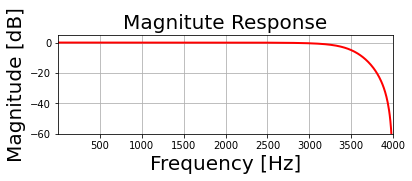

In [15]:
##Calculate Magnitude from hz in dB

Mag=20*np.log10(abs(hz))
##Calculate frequency in Hz from wz

Freq=wz*Fs/(2*np.pi)

##Plot Magnitude response
sub1 = plt.subplot(2, 1, 1)
sub1.plot(Freq,Mag, 'r', linewidth=2)  
sub1.axis([1, Fs/2, -60, 5])
sub1.set_title('Magnitute Response', fontsize=20)
sub1.set_xlabel('Frequency [Hz]', fontsize=20)
sub1.set_ylabel('Magnitude [dB]', fontsize=20)
sub1.grid()



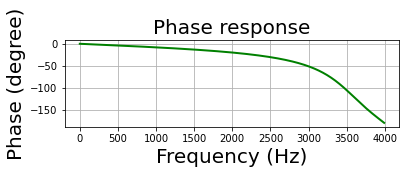

In [14]:
##Plot phase angle
sub2 = plt.subplot(2, 1, 2)
##Calculate phace angle in degree from hz
Phase = np.unwrap(np.angle(hz))*180/np.pi
sub2.plot(Freq, Phase, 'g', linewidth=2)
sub2.set_ylabel('Phase (degree)', fontsize=20)
sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
sub2.set_title(r'Phase response', fontsize=20)
sub2.grid()

plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()